In [1]:
import numpy as np
import matplotlib.pyplot as plt
import blip_analysis as ba
import exp_blip_models as ebm
import numpy as np
import daskify
from scipy.stats import ttest_ind
import pickle
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import trange 
import dask
from sklearn.svm import LinearSVC
from scipy.stats import norm
from sklearn.decomposition import PCA
from copy import deepcopy
from sklearn.cluster import KMeans
from matplotlib.gridspec import GridSpec
from label_axes import label_axes
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

b


In [2]:
unit_usrt1, unit_usrt2, unit_usrt3 = ba.load_usrts()
good_indexes = ba.get_stable_resp_indexes()
glyphs = ba.get_glyphs()

Found odour 1
Found odour 3
Found odour 5


In [3]:
unit_usrt_j = np.concatenate((unit_usrt1[good_indexes], unit_usrt2[good_indexes], unit_usrt3[good_indexes]), axis=0)
mean_usrt1 = np.array([[i.mean() for i in j] for j in unit_usrt1[good_indexes]])
mean_usrt2 = np.array([[i.mean() for i in j] for j in unit_usrt2[good_indexes]])
mean_usrt3 = np.array([[i.mean() for i in j] for j in unit_usrt3[good_indexes]])
mean_all_usrt = np.concatenate((mean_usrt1, mean_usrt2, mean_usrt3), axis=0)
norm_mean_all_usrt = (mean_all_usrt - np.min(mean_all_usrt, axis=-1)[:, np.newaxis])/(np.max(mean_all_usrt, axis=-1)[:, np.newaxis] - np.min(mean_all_usrt, axis=-1)[: ,np.newaxis])

In [49]:
print(unit_usrt_j.shape)

(390, 32)


In [4]:
diff_models1 = pickle.Unpickler(open('../Fig4/230320_diff_models1.pkl', 'rb')).load()
diff_models2 = pickle.Unpickler(open('../Fig4/230320_diff_models2.pkl', 'rb')).load()
diff_models3 = pickle.Unpickler(open('../Fig4/230320_diff_models3.pkl', 'rb')).load()
onset_models1 = pickle.Unpickler(open('../Fig4/230320_onset_models1.pkl', 'rb')).load()
conc_models1 = pickle.Unpickler(open('../Fig4/230320_conc_models1.pkl', 'rb')).load()



In [5]:
bins1 = np.array([[j.x[:-1] for j in i.training_opts] for i in diff_models1]).mean(axis=1)
bins2 = np.array([[j.x[:-1] for j in i.training_opts] for i in diff_models2]).mean(axis=1)
bins3 = np.array([[j.x[:-1] for j in i.training_opts] for i in diff_models3]).mean(axis=1)

all_preds = [i.pred_resp for i in diff_models1] + [i.pred_resp for i in diff_models2] + [i.pred_resp for i in diff_models3]
all_trues = [i.true_resp for i in diff_models1] + [i.true_resp for i in diff_models2] + [i.true_resp for i in diff_models3]


In [6]:
pca1 = PCA(n_components=9)
fit_bins1 = pca1.fit_transform(bins1)
fit_1_pc12 = deepcopy(fit_bins1)
fit_1_pc12[:, 2:] = 0
bins_1_pc12 = pca1.inverse_transform(fit_1_pc12)


pca2 = PCA(n_components=9)
fit_bins2 = pca2.fit_transform(bins2)
fit_2_pc12 = fit_bins2.copy()
fit_2_pc12[:, 2:] = 0
bins_2_pc12 = pca2.inverse_transform(fit_2_pc12)

pca3 = PCA(n_components=9)
fit_bins3 = pca3.fit_transform(bins3)
fit_3_pc12 = fit_bins3.copy()
fit_3_pc12[:, 2:] = 0
bins_3_pc12 = pca3.inverse_transform(fit_3_pc12)

pca_all = PCA(n_components=9)
all_bins = np.concatenate([bins1 , bins2 , bins3], axis=0)
fit_bins_all = pca_all.fit_transform(all_bins)
fit_all_pc12 = fit_bins_all.copy()
fit_all_pc12[:, 2:] = 0
bins_all_pc12 = pca_all.inverse_transform(fit_all_pc12)

[  0   1   2   3   4   5   7   8   9  11  12  13  14  15  16  17  19  20
  22  26  32  42  46  52  53  57  58  60  61  63  64  65  67  69  73  77
  82  84  86  89  97 112 128 129]
[  0   1   2   3   4   6   7   8   9  10  11  16  17  22  26  41  42  57
  58  61  64  68  73  82  90 124 127]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  17  20  22
  23  26  27  35  41  45  46  49  52  54  57  58  60  61  62  63  64  65
  66  67  68  69  70  73  78  79  86  89  90  97 100 101 128]


Text(0.5, 1.0, 'O3')

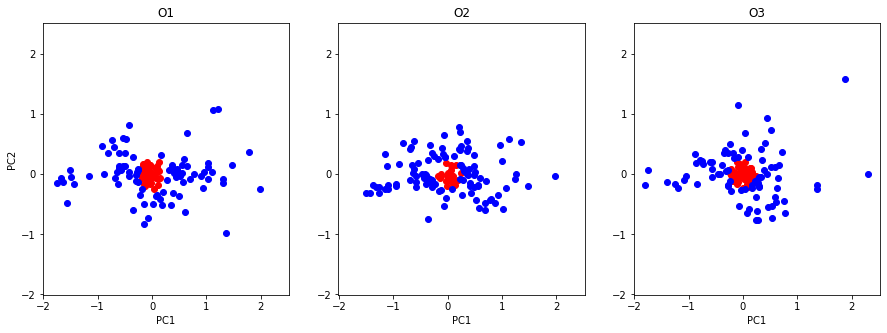

In [7]:
unresponsive_cells1 = np.where(np.linalg.norm(fit_bins1[:, :2], axis=-1) < 0.25)[0]
responsive_cells1 = np.where(np.linalg.norm(fit_bins1[:, :2], axis=-1) > 0.25)[0]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
print(unresponsive_cells1)
ax[0].scatter(fit_bins1[unresponsive_cells1, 0], fit_bins1[unresponsive_cells1, 1], c='r')
ax[0].scatter(fit_bins1[responsive_cells1, 0], fit_bins1[responsive_cells1, 1], c='b')

unresponsive_cells2 = np.where(np.linalg.norm(fit_bins2[:, :2], axis=-1) < 0.25)[0]
responsive_cells2 = np.where(np.linalg.norm(fit_bins2[:, :2], axis=-1) > 0.25)[0]
print(unresponsive_cells2)

ax[1].scatter(fit_bins2[unresponsive_cells2, 0], fit_bins2[unresponsive_cells2, 1], c='r')
ax[1].scatter(fit_bins2[responsive_cells2, 0], fit_bins2[responsive_cells2, 1], c='b')

unresponsive_cells3 = np.where(np.linalg.norm(fit_bins3[:, :2], axis=-1) < 0.25)[0]
responsive_cells3 = np.where(np.linalg.norm(fit_bins3[:, :2], axis=-1) > 0.25)[0]
print(unresponsive_cells3)

ax[2].scatter(fit_bins3[unresponsive_cells3, 0], fit_bins3[unresponsive_cells3, 1], c='r')
ax[2].scatter(fit_bins3[responsive_cells3, 0], fit_bins3[responsive_cells3, 1], c='b')

max_lims = np.max([ax[0].get_xlim(), ax[1].get_xlim(), ax[2].get_xlim(), ax[0].get_ylim(), ax[1].get_ylim(), ax[2].get_ylim()])
min_lims = np.min([ax[0].get_xlim(), ax[1].get_xlim(), ax[2].get_xlim(), ax[0].get_ylim(), ax[1].get_ylim(), ax[2].get_ylim()])
ax[0].set_xlim(min_lims, max_lims)
ax[0].set_ylim(min_lims, max_lims)
ax[1].set_xlim(min_lims, max_lims)
ax[1].set_ylim(min_lims, max_lims)
ax[2].set_xlim(min_lims, max_lims)
ax[2].set_ylim(min_lims, max_lims)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[2].set_xlabel('PC1')
ax[0].set_title('O1')
ax[1].set_title('O2')
ax[2].set_title('O3')

In [8]:
all_unresponsive_cells = unresponsive_cells1.tolist() + unresponsive_cells2.tolist() + unresponsive_cells3.tolist()
all_responsive_cells = [i for i in range(130) if i not in all_unresponsive_cells]
all_responsive_cells_joined = all_responsive_cells + [i + 130 for i in all_responsive_cells] + [i + 260 for i in all_responsive_cells]
print(all_responsive_cells_joined)    

[18, 21, 24, 25, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 40, 43, 44, 47, 48, 50, 51, 55, 56, 59, 71, 72, 74, 75, 76, 80, 81, 83, 85, 87, 88, 91, 92, 93, 94, 95, 96, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 148, 151, 154, 155, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 170, 173, 174, 177, 178, 180, 181, 185, 186, 189, 201, 202, 204, 205, 206, 210, 211, 213, 215, 217, 218, 221, 222, 223, 224, 225, 226, 228, 229, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 278, 281, 284, 285, 288, 289, 290, 291, 293, 294, 296, 297, 298, 299, 300, 303, 304, 307, 308, 310, 311, 315, 316, 319, 331, 332, 334, 335, 336, 340, 341, 343, 345, 347, 348, 351, 352, 353, 354, 355, 356, 358, 359, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 385, 386]


In [9]:
pc1_exp_decay = np.abs([i - np.median(fit_bins_all[:, 0]) for i in fit_bins_all[:, 0]]).mean()
pc2_exp_decay = np.abs([i - np.median(fit_bins_all[:, 1]) for i in fit_bins_all[:, 1]]).mean()
rand1 = np.random.laplace(0, pc1_exp_decay, 10000)
rand2 = np.random.laplace(0, pc2_exp_decay, 10000)
max_counts = 1

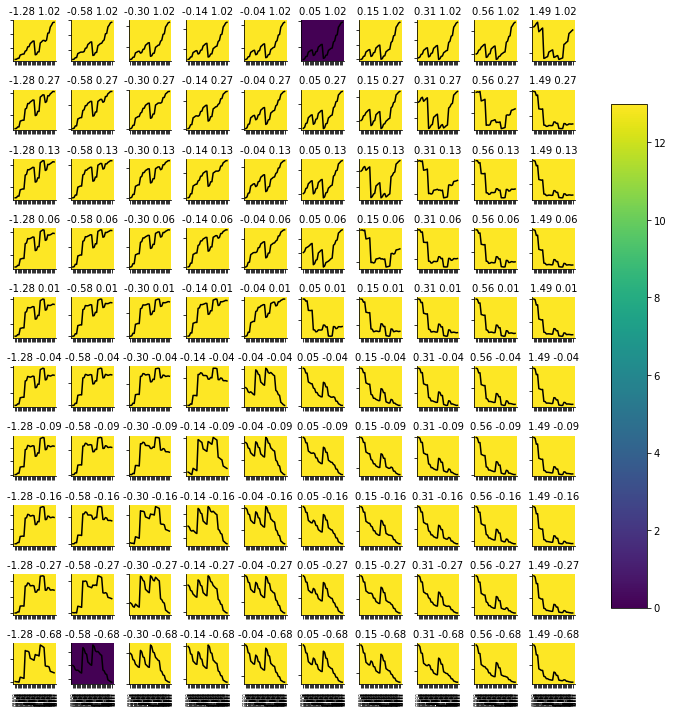

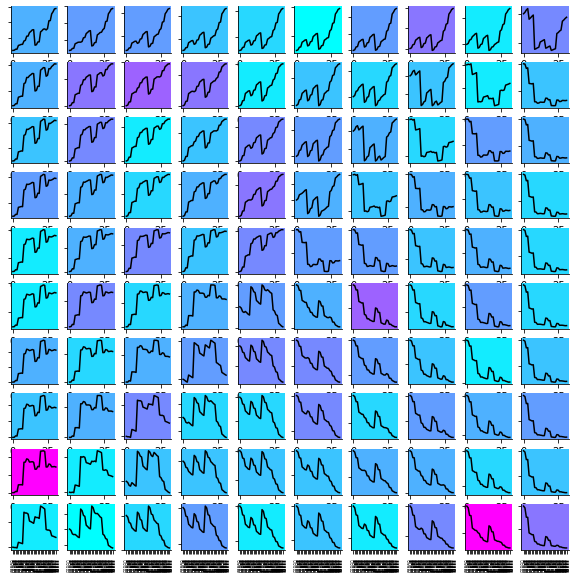

In [10]:

fig, ax = plt.subplots(10, 10, figsize=(10, 10), sharex=True, sharey=False)
pc1_quants = [np.quantile(fit_bins_all[:, 0], i) for i in np.arange(0.00, 1.05, 0.1)]
pc2_quants = [np.quantile(fit_bins_all[:, 1], i) for i in np.arange(0.00, 1.05, 0.1)]
pc2_quants = pc2_quants[::-1]
counts = []
density = False
comp = False
select_cells = range(390)
for i in range(len(pc1_quants)-1):
    for j in range(len(pc2_quants)-1):
        count = np.where((fit_bins_all[select_cells, 0] < pc1_quants[i+1]) & (fit_bins_all[select_cells, 1] >= pc2_quants[j+1]) 
                          & (fit_bins_all[select_cells, 0] >= pc1_quants[i]) & (fit_bins_all[select_cells, 1] < pc2_quants[j]))[0].shape[0]
        counts_lap = np.where((rand1 < pc1_quants[i+1]) & (rand2 >= pc2_quants[j+1])
                            & (rand1 >= pc1_quants[i]) & (rand2 < pc2_quants[j]))[0].shape[0]
        
        #count = np.where((fit_bins_all[:, 0] < i+0.05) & (fit_bins_all[:, 1] < j+0.05) & (fit_bins_all[:, 0] >= i - 0.05) & (fit_bins_all[:, 1] >= j - 0.05))[0].shape[0]
        #print(count)
        if density:
            count = count/len(select_cells)
            counts_lap = counts_lap/len(rand1)
        if comp:
            count = count - counts_lap
        #print(pca_all.components_[0]*pc1_steps[i]+0.25 + pca_all.components_[1]*pc2_steps[j]-0.25)
        counts.append(count)
        if comp:    
            ax[j, i].set_facecolor(mpl.cm.bwr(count/(2*max_counts) + 0.5))
        else:
            ax[j, i].set_facecolor(mpl.cm.viridis(count/max_counts))
        w = pca_all.components_[0]*((pc1_quants[i]+pc1_quants[i+1])/2) + pca_all.components_[1]*((pc2_quants[j]+pc2_quants[j+1])/2)
        pred_fits = np.exp(diff_models1[0].trial_array @ w)
        ax[j, i].plot(pred_fits,c='k')
        # ax[j, i].set_facecolor(mpl.cm.cool(count/max_counts))
        ax[j, i].set_yticklabels([])
        ax[j, i].set_title(f'{(pc1_quants[i]+pc1_quants[i+1])/2:.2f} {(pc2_quants[j]+pc2_quants[j+1])/2:.2f}', fontsize=10)
        ax[j, i].spines['right'].set_visible(False)
        ax[j, i].spines['top'].set_visible(False)
counts = np.array(counts)
max_counts = np.max(counts)
[i.set_xticks(range(32)) for i in ax[-1, :]]
[i.set_xticklabels(glyphs, rotation=90, fontsize=5) for i in ax[-1, :]]
plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
if comp:
    norm = mpl.colors.Normalize(vmin=-max_counts,vmax=max_counts)
    sm = mpl.cm.ScalarMappable(cmap=mpl.cm.bwr, norm=norm)
else:
    norm = mpl.colors.Normalize(vmin=0,vmax=max_counts)
    sm = mpl.cm.ScalarMappable(cmap=mpl.cm.viridis, norm=norm)
plt.colorbar(sm, cax=cbar_ax)

def plot_response_map(fig, gs, max_counts, titles=False):
    sub_gs = gs.subgridspec(10, 10)
    ax = np.array([[fig.add_subplot(sub_gs[i, j]) for j in range(10)] for i in range(10)])
    pc1_quants = [np.quantile(fit_bins_all[:, 0], i) for i in np.arange(0.00, 1.05, 0.1)]
    pc2_quants = [np.quantile(fit_bins_all[:, 1], i) for i in np.arange(0.00, 1.05, 0.1)]
    pc2_quants = pc2_quants[::-1]
    counts = []
    density = False
    comp = False
    select_cells = range(390)
    for i in range(len(pc1_quants)-1):
        for j in range(len(pc2_quants)-1):
            count = np.where((fit_bins_all[select_cells, 0] < pc1_quants[i+1]) & (fit_bins_all[select_cells, 1] >= pc2_quants[j+1]) 
                            & (fit_bins_all[select_cells, 0] >= pc1_quants[i]) & (fit_bins_all[select_cells, 1] < pc2_quants[j]))[0].shape[0]
            counts_lap = np.where((rand1 < pc1_quants[i+1]) & (rand2 >= pc2_quants[j+1])
                                & (rand1 >= pc1_quants[i]) & (rand2 < pc2_quants[j]))[0].shape[0]
            
            #count = np.where((fit_bins_all[:, 0] < i+0.05) & (fit_bins_all[:, 1] < j+0.05) & (fit_bins_all[:, 0] >= i - 0.05) & (fit_bins_all[:, 1] >= j - 0.05))[0].shape[0]
            #print(count)
            if density:
                count = count/len(select_cells)
                counts_lap = counts_lap/len(rand1)
            if comp:
                count = count - counts_lap
            #print(pca_all.components_[0]*pc1_steps[i]+0.25 + pca_all.components_[1]*pc2_steps[j]-0.25)
            counts.append(count)
            if comp:    
                ax[j, i].set_facecolor(mpl.cm.bwr(count/(2*max_counts) + 0.5))
            else:
                ax[j, i].set_facecolor(mpl.cm.cool(count/max_counts))
            w = pca_all.components_[0]*((pc1_quants[i]+pc1_quants[i+1])/2) + pca_all.components_[1]*((pc2_quants[j]+pc2_quants[j+1])/2)
            pred_fits = np.exp(diff_models1[0].trial_array @ w)
            ax[j, i].plot(pred_fits,c='k')
            # ax[j, i].set_facecolor(mpl.cm.cool(count/max_counts))
            ax[j, i].set_yticklabels([])
            if titles:
                ax[j, i].set_title(f'{(pc1_quants[i]+pc1_quants[i+1])/2:.2f} {(pc2_quants[j]+pc2_quants[j+1])/2:.2f}', fontsize=10)
            ax[j, i].spines['right'].set_visible(False)
            ax[j, i].spines['top'].set_visible(False)
    counts = np.array(counts)
    max_counts = np.max(counts)
    [i.set_xticks(range(32)) for i in ax[-1, :]]
    [i.set_xticklabels(glyphs, rotation=90, fontsize=5) for i in ax[-1, :]]
    #plt.tight_layout()
    # fig.subplots_adjust(right=0.8)
    # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    # if comp:
    #     norm = mpl.colors.Normalize(vmin=-max_counts,vmax=max_counts)
    #     sm = mpl.cm.ScalarMappable(cmap=mpl.cm.bwr, norm=norm)
    # else:
    #     norm = mpl.colors.Normalize(vmin=0,vmax=max_counts)
    #     sm = mpl.cm.ScalarMappable(cmap=mpl.cm.viridis, norm=norm)
    # plt.colorbar(sm, cax=cbar_ax)

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1)
plot_response_map(fig, gs[0], max_counts)

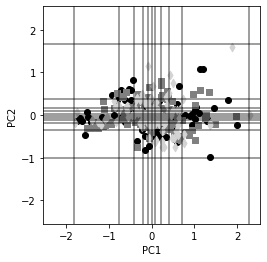

In [11]:
odour_grays = ['k', 'gray', 'lightgray']
markers = ['o', 's', 'd']
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.scatter(fit_bins1[:, 0], fit_bins1[:, 1], c=odour_grays[0], marker=markers[0], label='EB')
ax.scatter(fit_bins2[:, 0], fit_bins2[:, 1], c=odour_grays[1], marker=markers[1], label='IA')
ax.scatter(fit_bins3[:, 0], fit_bins3[:, 1], c=odour_grays[2], marker=markers[2], label='EA')

for i in pc1_quants:
    ax.axvline(i, c='k', alpha=0.5)
for i in pc2_quants:
    ax.axhline(i, c='k', alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
max_lim = np.max(np.abs([ax.get_xlim(), ax.get_ylim()]))
ax.set_xlim(-max_lim, max_lim)
ax.set_ylim(-max_lim, max_lim)
def plot_scatter_and_pos(ax):
    odour_grays = ['k', 'gray', 'lightgray']
    markers = ['o', 's', 'd']
    ax.scatter(fit_bins1[:, 0], fit_bins1[:, 1], c=odour_grays[0], marker=markers[0], label='EB')
    ax.scatter(fit_bins2[:, 0], fit_bins2[:, 1], c=odour_grays[1], marker=markers[1], label='IA')
    ax.scatter(fit_bins3[:, 0], fit_bins3[:, 1], c=odour_grays[2], marker=markers[2], label='EA')

    for i in pc1_quants:
        ax.axvline(i, c='k', alpha=0.5)
    for i in pc2_quants:
        ax.axhline(i, c='k', alpha=0.5)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    max_lim = np.max(np.abs([ax.get_xlim(), ax.get_ylim()]))
    ax.set_xlim(-max_lim, max_lim)
    ax.set_ylim(-max_lim, max_lim)

In [12]:
## clustering

pc1_steps = np.arange(-2.0, 2.1, 0.05)
pc2_steps = np.arange(-2.0, 2.1, 0.05)
pc2_steps = pc2_steps[::-1]
select_cells = range(390)
all_pred_fits = []
pred_fit_coords = []
all_ws = []
for i in range(len(pc1_steps)-1):
    for j in range(len(pc2_steps)-1):
        w = pca_all.components_[0]*((pc1_steps[i]+pc1_steps[i+1])/2) + pca_all.components_[1]*((pc2_steps[j]+pc2_steps[j+1])/2)
        pred_fits = np.exp(diff_models1[0].trial_array @ w)
        all_pred_fits.append((pred_fits - np.min(pred_fits))/(np.max(pred_fits) - np.min(pred_fits)))
        pred_fit_coords.append([(pc1_steps[i]+pc1_steps[i+1])/2, (pc2_steps[j]+pc2_steps[j+1])/2])

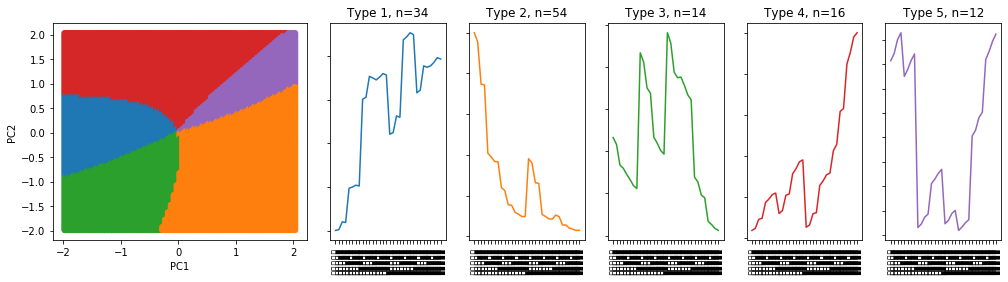

In [13]:
num_clusters =5
fig = plt.figure(figsize=(17, 4))
gs = GridSpec(1, 7)
sc_ax = fig.add_subplot(gs[:2])
kmeans = KMeans(n_clusters=num_clusters, random_state=1020)
kmeans.fit(np.array(all_pred_fits))
cs = [mpl.cm.tab10(i) for i in kmeans.labels_]
sc_ax.scatter(np.array(pred_fit_coords)[:, 0], np.array(pred_fit_coords)[:, 1], c=cs)
sc_ax.set_xlabel('PC1')
sc_ax.set_ylabel('PC2')
ax1 = fig.add_subplot(gs[2])
ax2 = fig.add_subplot(gs[3])
ax3 = fig.add_subplot(gs[4])
ax4 = fig.add_subplot(gs[5])
ax5 = fig.add_subplot(gs[6])

axs = [ax1, ax2, ax3, ax4, ax5]
[i.set_xticks(range(32)) for i in axs]
[i.set_xticklabels(glyphs, rotation=90) for i in axs]
[i.set_yticklabels([]) for i in axs]
kpreds = kmeans.predict(np.array(norm_mean_all_usrt))
for i in range(num_clusters):
    axs[i].plot(np.mean(np.array(all_pred_fits)[np.where(kmeans.labels_ == i)[0]], axis=0), c=mpl.cm.tab10(i))
    axs[i].set_title(f'Type {i+1}, n={len(np.where(kpreds[:130] == i)[0])}')


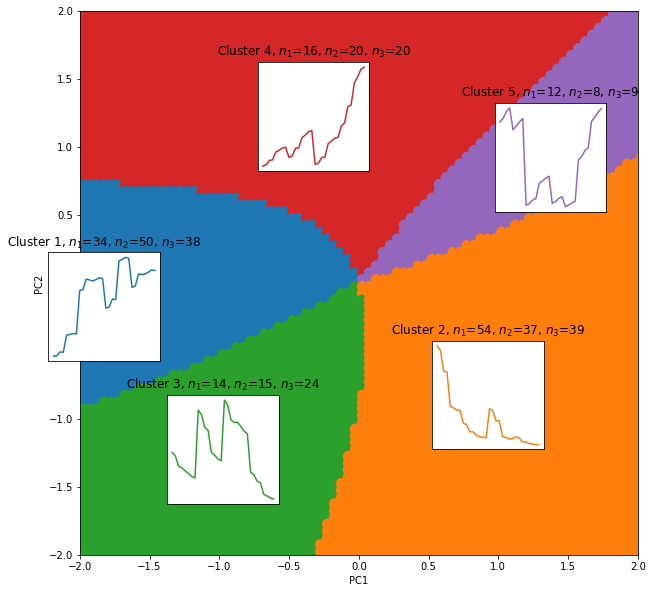

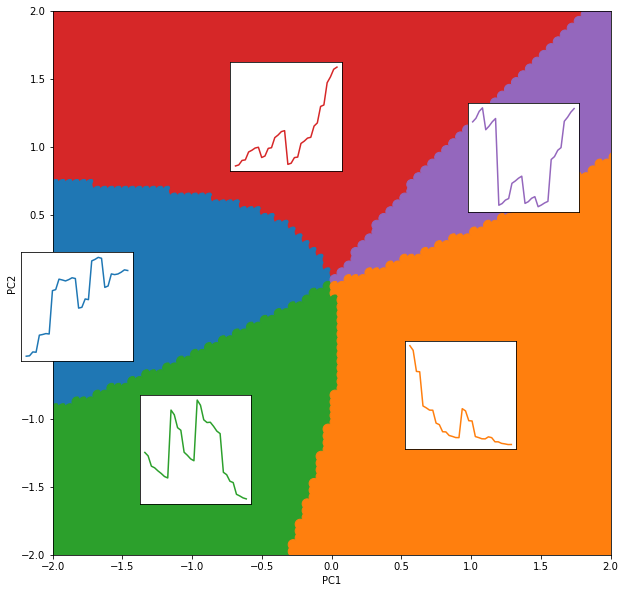

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# kmeans = KMeans(n_clusters=5)
# kmeans.fit(np.array(all_pred_fits))
cs = [mpl.cm.tab10(i) for i in kmeans.labels_]
ax.scatter(np.array(pred_fit_coords)[:, 0], np.array(pred_fit_coords)[:, 1], c=cs, s=100)
all_pred_fits = np.array(all_pred_fits)
pc_coord_index = np.argmin(np.abs(all_pred_fits - np.mean(all_pred_fits[kmeans.labels_ == 2], axis=0)).sum(axis=-1))
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
for i in range(5):
    pc_coord_index = np.argmin(np.abs(all_pred_fits - np.mean(all_pred_fits[kmeans.labels_ == i], axis=0)).sum(axis=-1))
    sub_ax = ax.inset_axes([(pred_fit_coords[pc_coord_index][0]+1.5)/4, (pred_fit_coords[pc_coord_index][1]+1.5)/4, 0.2, 0.2])
    sub_ax.set_xticks([])
    sub_ax.set_yticks([])
    #sub_ax.plot(pca_all.components_[0]*pred_fit_coords[pc_coord_index][0] + pca_all.components_[1]*pred_fit_coords[pc_coord_index][1], c='k')
    sub_ax.plot(np.mean(np.array(all_pred_fits)[np.where(kmeans.labels_ == i)[0]], axis=0), c=mpl.cm.tab10(i))
    sub_ax.set_title(f'Cluster {i+1}, $n_1$={len(np.where(kpreds[:130] == i)[0])}, $n_2$={len(np.where(kpreds[130:260] == i)[0])}, $n_3$={len(np.where(kpreds[260:] == i)[0])}')

def plot_archetypes(ax, all_pred_fits, show_text=False):
    cs = [mpl.cm.tab10(i) for i in kmeans.labels_]
    ax.scatter(np.array(pred_fit_coords)[:, 0], np.array(pred_fit_coords)[:, 1], c=cs, s=100)
    all_pred_fits = np.array(all_pred_fits)
    pc_coord_index = np.argmin(np.abs(all_pred_fits - np.mean(all_pred_fits[kmeans.labels_ == 2], axis=0)).sum(axis=-1))
    ax.set_ylabel('PC2')
    ax.set_xlabel('PC1')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    for i in range(5):
        pc_coord_index = np.argmin(np.abs(all_pred_fits - np.mean(all_pred_fits[kmeans.labels_ == i], axis=0)).sum(axis=-1))
        sub_ax = ax.inset_axes([(pred_fit_coords[pc_coord_index][0]+1.5)/4, (pred_fit_coords[pc_coord_index][1]+1.5)/4, 0.2, 0.2])
        sub_ax.set_xticks([])
        sub_ax.set_yticks([])
        #sub_ax.plot(pca_all.components_[0]*pred_fit_coords[pc_coord_index][0] + pca_all.components_[1]*pred_fit_coords[pc_coord_index][1], c='k')
        sub_ax.plot(np.mean(np.array(all_pred_fits)[np.where(kmeans.labels_ == i)[0]], axis=0), c=mpl.cm.tab10(i))
        if show_text:
            sub_ax.set_title(f'Cluster {i+1}, $n_1$={len(np.where(kpreds[:130] == i)[0])}, $n_2$={len(np.where(kpreds[130:260] == i)[0])}, $n_3$={len(np.where(kpreds[260:] == i)[0])}')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_archetypes(ax, all_pred_fits)

In [14]:
#unit_usrt_j = np.concatenate([unit_usrt1, unit_usrt2, unit_usrt3], axis=0)

def split_and_classify(usrt_scattered, unit_indexes, trial_indexes=range(32), scaled=True, shuffle=False, pcad=True, pca_count=1, classifier=RandomForestClassifier, classifier_params={}):
    train, test = ba.split_bs_data(usrt_scattered[unit_indexes])
    unit_count = len(unit_indexes)
    train_sum = train.sum(axis=-1)[:, trial_indexes].reshape(unit_count, -1).T
    test_sum = test.sum(axis=-1)[:, trial_indexes].reshape(unit_count, -1).T
    y_train = np.hstack([[i for j in range(60)] for i in trial_indexes])
    y_test = trial_indexes
    if scaled:
        scaler = StandardScaler()
        train_sum = scaler.fit_transform(train_sum)
        test_sum = scaler.transform(test_sum)
    svm = classifier(**classifier_params)
    if shuffle:
        np.random.shuffle(y_train)
    svm.fit(train_sum, y_train)
    return svm.score(test_sum, y_test), svm.predict(test_sum)

def classify_multiple(data, kpreds, repeat_number = 100, same_unit_limit=False, trial_indexes=range(32)):
    all_scores = []
    all_preds = []
    min_num_clusters = np.min([len(np.where(kpreds == i)[0]) for i in range(len(np.unique(kpreds)))])
    for j in range(len(np.unique(kpreds))):
        scores = []
        preds = []
        for i in trange(repeat_number, leave=False, position=0):
            unit_indexes = np.where(kpreds == j)[0]
            if same_unit_limit:
                unit_indexes = np.random.choice(unit_indexes, size=min_num_clusters, replace=False)
            score, pred = split_and_classify(data, unit_indexes, trial_indexes=trial_indexes)
            scores.append(score)
            preds.append(pred)
        all_scores.append(scores)
        all_preds.append(preds)
        print(j)
    return all_scores, all_preds

def plot_cms(all_preds, diff=False, set_vmax=False, trial_indexes=range(32)):
    fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
    cms = []
    ims = []
    for i in range(5):
        cm = confusion_matrix(np.concatenate([trial_indexes for j in range(100)]), np.concatenate(all_preds[i]), normalize='true')
        if diff:
            cm = cm - cm_j_true
            im = ax[i].imshow(cm, cmap='seismic', vmin=-np.max(np.abs(cm)), vmax=np.max(np.abs(cm)))
        else:
            im = ax[i].imshow(cm, cmap='plasma')
        #ax[i].set_title(f'Cluster {i} count:{len(np.where(kpreds == i)[0])}')
        cms.append(cm)
        ims.append(im)
    if set_vmax and not diff:
        [i.set_clim(0, np.max(cms)) for i in ims]
    if set_vmax and diff:
        [i.set_clim(-np.max(np.abs(cms)), np.max(np.abs(cms))) for i in ims]
    [plt.colorbar(ims[i], ax=ax[i]) for i in range(5)]
    plt.draw()
    #plt.show()
    return ax, cms

#split_and_classify(unit_usrt1, np.where(kpreds[:130] != 2)[0])

In [15]:
iti_trials = [24, 20, 18, 17]
onset_trials = [16, 8, 4, 2, 1]
conc_trials = [16, 24, 28, 30, 31]

In [ ]:
np.save('230627_archetype_labels.npy', kpreds)

In [63]:
all_scores_limit, all_preds_limit = classify_multiple(unit_usrt_j, kpreds, repeat_number=100, same_unit_limit=True)
print('all')
iti_scores_limit, iti_preds_limit = classify_multiple(unit_usrt_j, kpreds, repeat_number=100, same_unit_limit=True, trial_indexes=iti_trials)
print('iti')
onset_scores_limit, onset_preds_limit = classify_multiple(unit_usrt_j, kpreds, repeat_number=100, same_unit_limit=True, trial_indexes=onset_trials)
print('onset')
conc_scores_limit, conc_preds_limit = classify_multiple(unit_usrt_j, kpreds, repeat_number=100, same_unit_limit=True, trial_indexes=conc_trials)
print('conc')
full_onset_scores, full_onset_preds = classify_multiple(unit_usrt_j, np.zeros(390), repeat_number=100, same_unit_limit=True, trial_indexes=onset_trials)
print('full onset')

  0%|          | 0/100 [00:00<?, ?it/s]          

0


  0%|          | 0/100 [00:00<?, ?it/s]          

1


  0%|          | 0/100 [00:00<?, ?it/s]          

2


  0%|          | 0/100 [00:00<?, ?it/s]          

3


  1%|          | 1/100 [00:00<00:19,  5.07it/s]  

4
all


  1%|          | 1/100 [00:00<00:19,  5.04it/s]  

0


  1%|          | 1/100 [00:00<00:19,  5.14it/s]  

1


  1%|          | 1/100 [00:00<00:19,  5.07it/s]  

2


  1%|          | 1/100 [00:00<00:19,  5.18it/s]  

3


  0%|          | 0/100 [00:00<?, ?it/s]          

4
iti


  1%|          | 1/100 [00:00<00:19,  5.01it/s]  

0


  0%|          | 0/100 [00:00<?, ?it/s]          

1


  0%|          | 0/100 [00:00<?, ?it/s]          

2


  0%|          | 0/100 [00:00<?, ?it/s]          

3


  0%|          | 0/100 [00:00<?, ?it/s]          

4
onset


  0%|          | 0/100 [00:00<?, ?it/s]          

0


  0%|          | 0/100 [00:00<?, ?it/s]          

1


  0%|          | 0/100 [00:00<?, ?it/s]          

2


  0%|          | 0/100 [00:00<?, ?it/s]          

3


  0%|          | 0/100 [00:00<?, ?it/s]          

4
conc


0
full onset


In [121]:
np.save('230614_all_scores_limit.npy', all_scores_limit)
np.save('230614_all_preds_limit.npy', all_preds_limit)
np.save('230614_iti_scores_limit.npy', iti_scores_limit)
np.save('230614_iti_preds_limit.npy', iti_preds_limit)
np.save('230614_onset_scores_limit.npy', onset_scores_limit)
np.save('230614_onset_preds_limit.npy', onset_preds_limit)
np.save('230614_conc_scores_limit.npy', conc_scores_limit)
np.save('230614_conc_preds_limit.npy', conc_preds_limit)
np.save('230614_full_onset_scores.npy', full_onset_scores)
np.save('230614_full_onset_preds.npy', full_onset_preds)


In [16]:
all_scores_limit = list(np.load('230614_all_scores_limit.npy'))
all_preds_limit = list(np.load('230614_all_preds_limit.npy'))
iti_scores_limit = list(np.load('230614_iti_scores_limit.npy'))
iti_preds_limit = list(np.load('230614_iti_preds_limit.npy'))
onset_scores_limit = list(np.load('230614_onset_scores_limit.npy'))
onset_preds_limit = list(np.load('230614_onset_preds_limit.npy'))
conc_scores_limit = list(np.load('230614_conc_scores_limit.npy'))
conc_preds_limit = list(np.load('230614_conc_preds_limit.npy'))
full_onset_scores = list(np.load('230614_full_onset_scores.npy'))
full_onset_preds = list(np.load('230614_full_onset_preds.npy'))

20 20


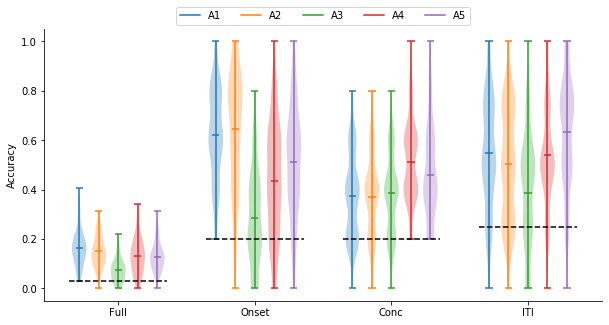

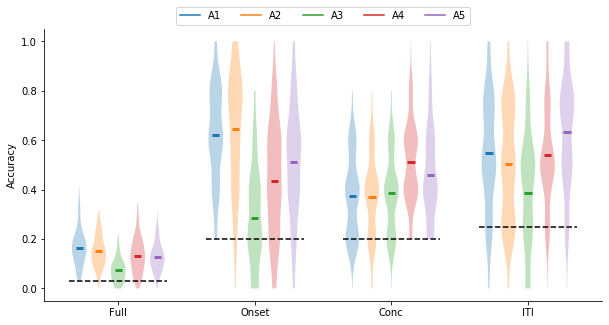

In [17]:
plt.figure(figsize=(10, 5))
pos1 = [-.2, 0.8, 1.8, 2.8, 3.8, 0, 1, 2, 3, 4, 0.2, 1.2, 2.2, 3.2, 4.2]
pos2 = [-.4, -.2, 0, .2, .4, 1, 1.2, 1.4, 1.6, 1.8, 2.4, 2.6, 2.8, 3.0, 3.2]
pos3 = pos2 + [3.8, 4.0, 4.2, 4.4, 4.6]
print(len(pos3), len(all_scores_limit + onset_scores_limit + conc_scores_limit + iti_scores_limit))
vps = plt.violinplot(all_scores_limit + onset_scores_limit + conc_scores_limit + iti_scores_limit, showmeans=True, positions=pos3, widths=0.15)
plt.plot([], [], c='C0', label='A1')
plt.plot([], [], c='C1', label='A2')
plt.plot([], [], c='C2', label='A3')
plt.plot([], [], c='C3', label='A4')
plt.plot([], [], c='C4', label='A5')
colors = ['C0', 'C1', 'C2', 'C3', 'C4']*4
for pc, color in zip(vps['bodies'], colors):
    pc.set_facecolor(color)
for i in ['cmins', 'cmaxes', 'cmeans', 'cbars']:
    vps[i].set_color(colors)
plt.xticks([0, 1.4, 2.8, 4.2], labels=['Full', 'Onset', 'Conc', 'ITI'])

plt.ylabel('Accuracy')
plt.legend(ncol=5, bbox_to_anchor=(0.5, 1.1), loc='upper center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot([-0.5, .5], [1/32, 1/32], c='k', linestyle='--')
plt.plot([.9, 1.9], [1/5, 1/5], c='k' , linestyle='--')
plt.plot([2.3, 3.3], [1/5, 1/5], c='k', linestyle='--')
plt.plot([3.7, 4.7], [1/4, 1/4], c='k', linestyle='--')

def plot_acc_violins(ax):
    pos1 = [-.2, 0.8, 1.8, 2.8, 3.8, 0, 1, 2, 3, 4, 0.2, 1.2, 2.2, 3.2, 4.2]
    pos2 = [-.4, -.2, 0, .2, .4, 1, 1.2, 1.4, 1.6, 1.8, 2.4, 2.6, 2.8, 3.0, 3.2]
    pos3 = pos2 + [3.8, 4.0, 4.2, 4.4, 4.6]
    vps = ax.violinplot(all_scores_limit + onset_scores_limit + conc_scores_limit + iti_scores_limit, showmeans=True, positions=pos3, widths=0.15)
    ax.plot([], [], c='C0', label='A1')
    ax.plot([], [], c='C1', label='A2')
    ax.plot([], [], c='C2', label='A3')
    ax.plot([], [], c='C3', label='A4')
    ax.plot([], [], c='C4', label='A5')
    colors = ['C0', 'C1', 'C2', 'C3', 'C4']*4
    for pc, color in zip(vps['bodies'], colors):
        pc.set_facecolor(color)
    for i in ['cmins', 'cmaxes', 'cmeans', 'cbars']:
        vps[i].set_color(colors)
        vps[i].set_linewidth(3)
    vps['cbars'].set_visible(False)
    vps['cmins'].set_visible(False)
    vps['cmaxes'].set_visible(False)
    ax.set_xticks([0, 1.4, 2.8, 4.2])
    ax.set_xticklabels(['Full', 'Onset', 'Conc', 'ITI'])

    ax.set_ylabel('Accuracy')
    ax.legend(ncol=5, bbox_to_anchor=(0.5, 1.1), loc='upper center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.plot([-0.5, .5], [1/32, 1/32], c='k', linestyle='--')
    ax.plot([.9, 1.9], [1/5, 1/5], c='k' , linestyle='--')
    ax.plot([2.3, 3.3], [1/5, 1/5], c='k', linestyle='--')
    ax.plot([3.7, 4.7], [1/4, 1/4], c='k', linestyle='--')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_acc_violins(ax)

In [65]:
print(unit_usrt_j.shape)

(390, 32)


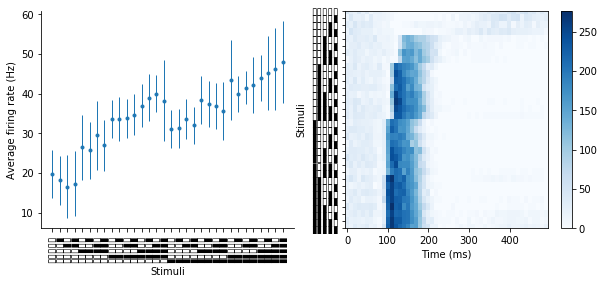

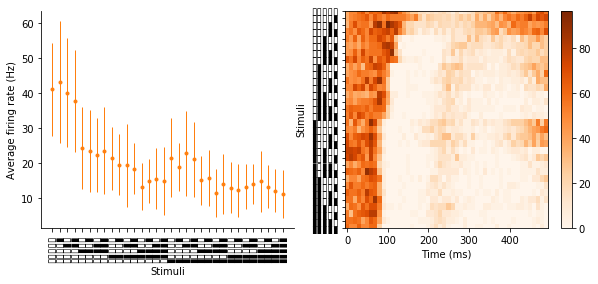

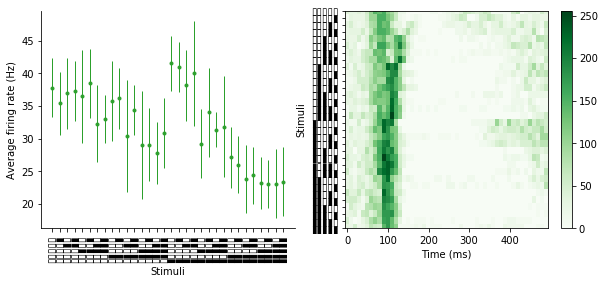

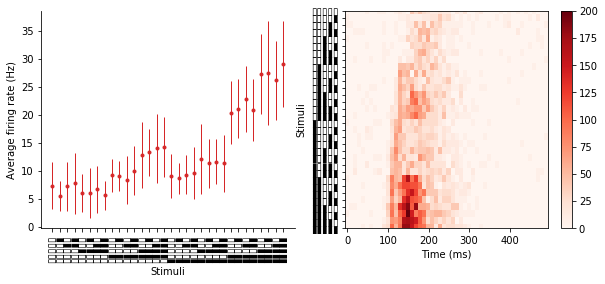

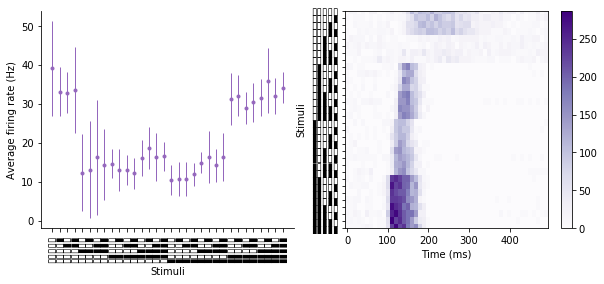

In [18]:
def plot_selected_cell_response(usrt_joined, cell_index, ax=None, color='k'):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    select_cell = usrt_joined[cell_index]
    cell_stds = [np.std(i.mean(axis=-1)) for i in select_cell]
    cell_means = [np.mean(i.mean(axis=-1)) for i in select_cell]
    ax.errorbar(range(32), cell_means, yerr=cell_stds, c=color, fmt='o', markersize=3, linewidth=1)
    ax.set_xticks(range(32))
    ax.set_xticklabels(glyphs, rotation=90)
    ax.set_ylabel('Average firing rate (Hz)')
    ax.set_xlabel('Stimuli')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def plot_selected_cell_heatmap(usrt_joined, cell_index, trial_indexes=range(32), ax=None, cmap='viridis'):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    select_cell = usrt_joined[cell_index]
    cell_means = [i.mean(axis=0) for i in select_cell]
    im = ax.imshow(cell_means, aspect='auto', cmap=cmap)
    plt.colorbar(mappable=im, ax=ax)
    ax.set_yticks(range(32))
    ax.set_yticklabels(glyphs)
    ax.set_xticks([0, 10, 20, 30, 40])
    ax.set_xticklabels([0, 100, 200, 300, 400])
    ax.set_ylabel('Stimuli')
    ax.set_xlabel('Time (ms)')

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_selected_cell_response(unit_usrt_j, 348, ax=ax[0], color='C0')
plot_selected_cell_heatmap(unit_usrt_j, 348, ax=ax[1], cmap='Blues')
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_selected_cell_response(unit_usrt_j, 162, ax=ax[0], color='C1')
plot_selected_cell_heatmap(unit_usrt_j, 162, ax=ax[1], cmap='Oranges')
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_selected_cell_response(unit_usrt_j, 233, ax=ax[0], color='C2')
plot_selected_cell_heatmap(unit_usrt_j, 233, ax=ax[1], cmap='Greens')
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_selected_cell_response(unit_usrt_j, 50, ax=ax[0], color='C3')
plot_selected_cell_heatmap(unit_usrt_j, 50, ax=ax[1], cmap='Reds')
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_selected_cell_response(unit_usrt_j, 37, ax=ax[0], color='C4')
plot_selected_cell_heatmap(unit_usrt_j, 37, ax=ax[1], cmap='Purples')

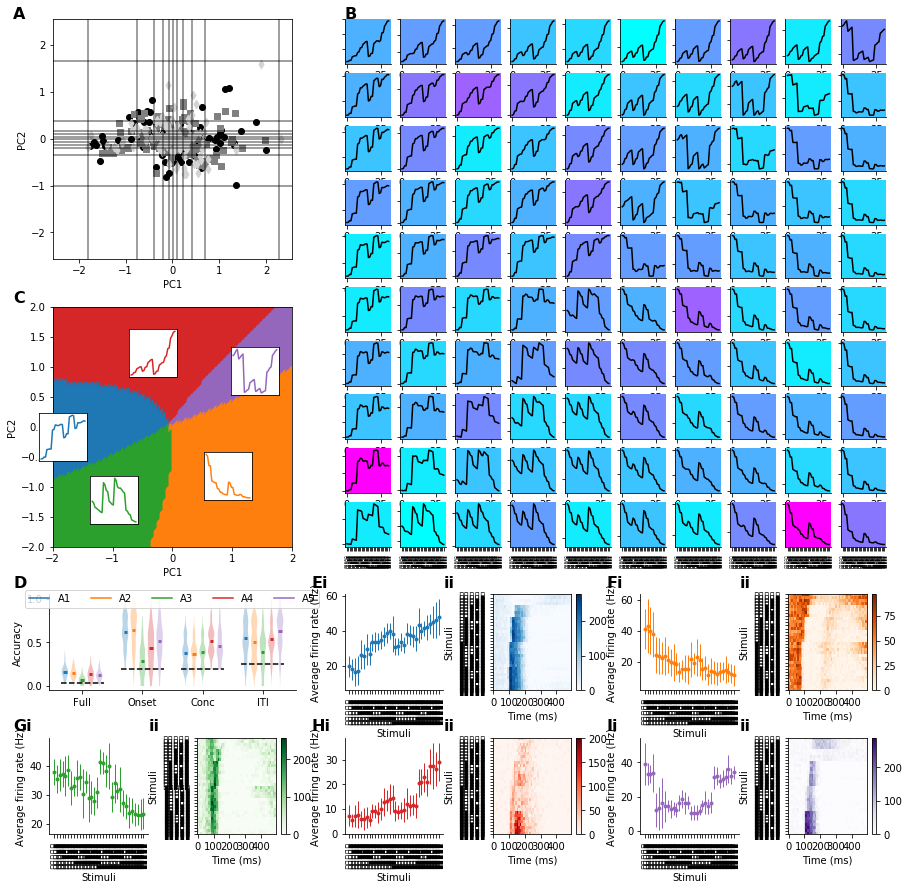

In [22]:
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(6, 6, figure=fig, hspace=0.5, wspace=0.5)
response_map_ax = fig.add_subplot(gs[:4, 2:], frameon=False)
response_map_ax.set_xticks([])
response_map_ax.set_yticks([])

plot_response_map(fig, gs[:4, 2:], max_counts)
pc_ax = fig.add_subplot(gs[:2, :2], aspect='equal')
plot_scatter_and_pos(pc_ax)
arc_ax = fig.add_subplot(gs[2:4, :2], aspect='equal')
plot_archetypes(arc_ax, all_pred_fits)
violin_ax = fig.add_subplot(gs[4, :2])
examp_ax11 = fig.add_subplot(gs[4, 2])
examp_ax12 = fig.add_subplot(gs[4, 3])
examp_ax21 = fig.add_subplot(gs[4, 4])
examp_ax22 = fig.add_subplot(gs[4, 5])
examp_ax31 = fig.add_subplot(gs[5, 0])
examp_ax32 = fig.add_subplot(gs[5, 1])
examp_ax41 = fig.add_subplot(gs[5, 2])
examp_ax42 = fig.add_subplot(gs[5, 3])
examp_ax51 = fig.add_subplot(gs[5, 4])
examp_ax52 = fig.add_subplot(gs[5, 5])
plot_acc_violins(violin_ax)
plot_selected_cell_response(unit_usrt_j, 348, ax=examp_ax11, color='C0')
plot_selected_cell_heatmap(unit_usrt_j, 348, ax=examp_ax12, cmap='Blues')
plot_selected_cell_response(unit_usrt_j, 162, ax=examp_ax21, color='C1')
plot_selected_cell_heatmap(unit_usrt_j, 162, ax=examp_ax22, cmap='Oranges')
plot_selected_cell_response(unit_usrt_j, 233, ax=examp_ax31, color='C2')
plot_selected_cell_heatmap(unit_usrt_j, 233, ax=examp_ax32, cmap='Greens')
plot_selected_cell_response(unit_usrt_j, 50, ax=examp_ax41, color='C3')
plot_selected_cell_heatmap(unit_usrt_j, 50, ax=examp_ax42, cmap='Reds')
plot_selected_cell_response(unit_usrt_j, 37, ax=examp_ax51, color='C4')
plot_selected_cell_heatmap(unit_usrt_j, 37, ax=examp_ax52, cmap='Purples')
axes = [pc_ax, response_map_ax, arc_ax, violin_ax, examp_ax11, examp_ax12, examp_ax21, examp_ax22, examp_ax31, examp_ax32, examp_ax41, examp_ax42, examp_ax51, examp_ax52]
labels = ['A', 'B', 'C', 'D', 'Ei', 'ii', 'Fi', 'ii', 'Gi', 'ii', 'Hi', 'ii', 'Ii', 'ii']
align_x = [[0, 2, 3, 8], [5, 11], [6, 12], [7, 13]]
align_y = [[0, 1], [3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13]]
label_axes.label_axes(axes, labels, fontsize=16, fontweight='bold', align_x=align_x, align_y=align_y)
plt.savefig('230703_fig6.pdf', bbox_inches='tight')